In [1]:
province = "Ha Giang"

# Basic data

In [2]:
!pip install roads-cba-py seaborn matplotlib
!pip install roads-cba-py --upgrade

You should consider upgrading via the '/Users/jamescook/.pyenv/versions/3.8.10/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/jamescook/.pyenv/versions/3.8.10/bin/python3.8 -m pip install --upgrade pip' command.


In [4]:
import pandas as pd
from matplotlib import pyplot as plt
#import seaborn as sns
import numpy as np

roads_cba_py_path = '/Users/jamescook/world_bank/roads-cba-py'
if roads_cba_py_path not in sys.path:
    sys.path.append(roads_cba_py_path)

from roads_cba_py.cba import CostBenefitAnalysisModel
from roads_cba_py.section import Section, InvalidSection



In [5]:
url = 'http://orma-uat.drvn.gov.vn:4000/admin/province/units'
provinces_list = pd.json_normalize(pd.read_json(url)['province'])

In [17]:
prov_id = provinces_list.query(f'name_en == "{province}"')['id']
url = f'http://orma-uat.drvn.gov.vn:4000/cba/roads/live?province={int(prov_id)}'
assets_live = pd.read_json(url)


In [8]:
prov_id = provinces_list.query(f'name_en == "{province}"')['id']
url = f'http://orma-uat.drvn.gov.vn:4000/cba/roads/snapshot/9'
assets = pd.read_json(url)
print(assets.shape)
assets.head()

(1884, 28)


,orma_way_id,vpromms_id,length,vpromms_length,province,district,lanes,terrain,width,surface_type,condition_class,roughness,traffic_level,traffic_growth,pavement_age,aadt_motorcyle,aadt_carsmall,aadt_carmedium,aadt_delivery,aadt_4wheel,aadt_smalltruck,aadt_mediumtruck,aadt_largetruck,aadt_articulatedtruck,aadt_smallbus,aadt_mediumbus,aadt_largebus,aadt_total
0,595052,None,0.065318,NaN,294,305,0,NaN,0.0,NaN,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,603273,None,0.574738,NaN,294,301,0,NaN,0.0,NaN,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,614879,None,2.555914,NaN,294,296,0,NaN,0.0,NaN,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,614880,None,0.690284,NaN,294,296,0,NaN,0.0,NaN,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,614982,None,0.063700,NaN,294,299,0,NaN,0.0,NaN,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
assets.query('orma_way_id == 637504')

import roads_cba_py.cba as cba
from roads_cba_py.cba_result import CbaResult
from roads_cba_py.config import Config

cba_model = cba.CostBenefitAnalysisModel(Config())
section = assets.query('orma_way_id == 637504').to_dict('records')[0]
section = Section.parse_obj(section)
# result = cba_model.compute_cba_for_section(section)
section.json()


'{"orma_way_id": "637504", "vpromms_id": "034QG00059", "road_name": "", "road_start": "", "road_end": "", "section_order": -1, "province": "294", "district": "305", "commune": "", "management": -1, "start_km": 0.0, "end_km": 0.0, "length": 6.290908426469055, "vpromms_length": 6.29090842646905, "lanes": 0, "width": 2.5, "road_class": 0, "terrain": 3, "temperature": 0, "moisture": 0, "road_type": 0, "surface_type": 1, "condition_class": 5, "roughness": 0.0, "traffic_level": 3, "traffic_growth": 0, "structural_no": 0.0, "pavement_age": 0, "aadt_motorcyle": 0.0, "aadt_carsmall": 0.0, "aadt_carmedium": 0.0, "aadt_delivery": 0.0, "aadt_4wheel": 0.0, "aadt_smalltruck": 0.0, "aadt_mediumtruck": 0.0, "aadt_largetruck": 0.0, "aadt_articulatedtruck": 0.0, "aadt_smallbus": 0.0, "aadt_mediumbus": 0.0, "aadt_largebus": 0.0, "aadt_total": 0.0, "road_number": "", "REQUIRED_FIELDS": ["lanes", "width"]}'

In [41]:
assets.query('orma_way_id == 636883')

,orma_way_id,vpromms_id,length,vpromms_length,province,district,lanes,terrain,width,surface_type,condition_class,roughness,traffic_level,traffic_growth,pavement_age,aadt_motorcyle,aadt_carsmall,aadt_carmedium,aadt_delivery,aadt_4wheel,aadt_smalltruck,aadt_mediumtruck,aadt_largetruck,aadt_articulatedtruck,aadt_smallbus,aadt_mediumbus,aadt_largebus,aadt_total
1029,636883,034HG00033,1.122436,1.122436,294,295,0,3.0,3.0,1.0,3.0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# VPROMMS Correspondence

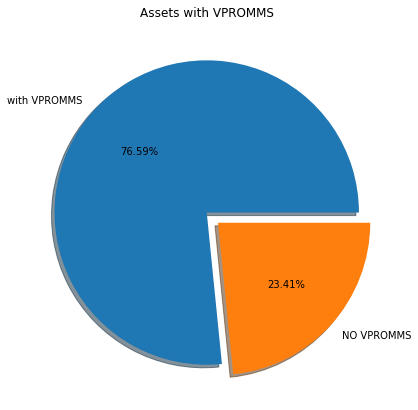

In [17]:
# Creating dataset
lbl = ['with VPROMMS', 'NO VPROMMS']
  
data = [assets[~assets.vpromms_id.isna()].shape[0], assets[assets.vpromms_id.isna()].shape[0]]
  
# Creating plot
fig = plt.figure(figsize =(10, 7))
explode=(0,0.1)
plt.pie(data, labels = lbl,autopct='%1.2f%%', explode=explode,shadow=True)
plt.title("Assets with VPROMMS")
# show plot
plt.show()

In [ ]:
assets.head()

# Length Discrepancies

In [ ]:
withvp = assets[~assets.vpromms_length.isna()]

In [ ]:
vpromms_length = withvp.groupby(['vpromms_id']).max()[['vpromms_length']]
geo_length = withvp.groupby(['vpromms_id']).sum()[['length']]
comparison_length = geo_length.join(vpromms_length)

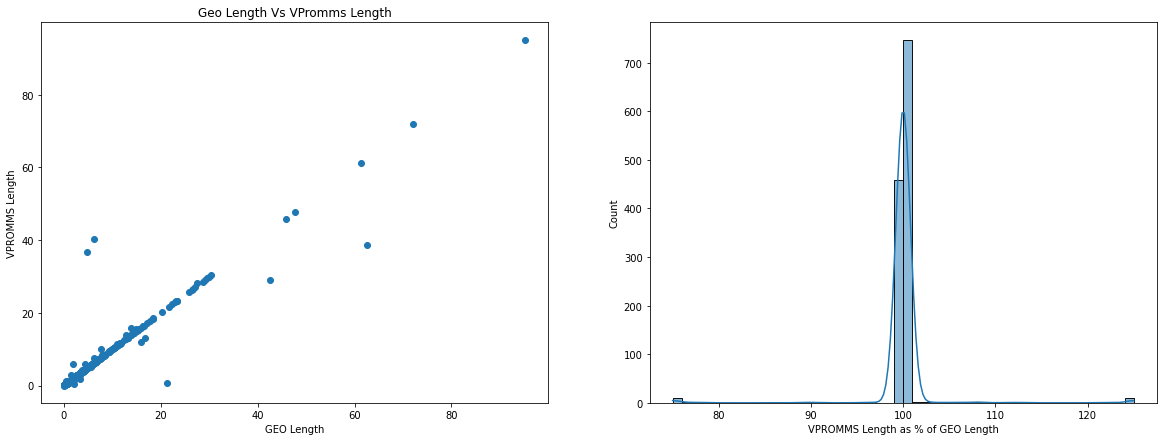

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize =(20, 7))

ax1.scatter(comparison_length.length, comparison_length.vpromms_length)
ax1.set_xlabel("GEO Length")
ax1.set_ylabel("VPROMMS Length")
ax1.set_title("Geo Length Vs VPromms Length")

lower,upper = (75,125) # Percentages
ratio = 100.0 * comparison_length.vpromms_length / comparison_length.length
ratio[ratio > upper] = upper
ratio[ratio < lower] = lower
sns.histplot(x=ratio,bins=50,binrange=[lower,upper], kde=True)
ax2.set_xlabel("VPROMMS Length as % of GEO Length")

# show plot
plt.show()

## Assets with VPROMMS length at least 20% LARGER than Geo Length

In [ ]:
long_links = comparison_length[comparison_length.vpromms_length>1.2 * comparison_length.length]
long_links

,length,vpromms_length
vpromms_id,,
033HSP00016,6.141937,40.400000
033ĐV00006,7.594590,10.000000
034BM00028,6.171641,7.511424
034BM00037,0.840030,1.160474
034DV00007,4.691464,36.875373
034HSP00070,1.851581,5.800000
034VX00029,0.470014,1.158610
034XM00004,1.451943,2.886877
034XM00052,0.188688,0.304199


## Assets with VPROMMS length at least 20% smaller than geo Length

In [ ]:
short_links = comparison_length[comparison_length.vpromms_length * 1.2 < comparison_length.length]
short_links

,length,vpromms_length
vpromms_id,,
032HG00002,62.580390,38.549713
033HS00016,42.633882,29.104374
033YM00010,16.021078,12.054780
033ĐV00003,2.555984,2.000000
034BQ00022,3.250693,1.738980
034BQ00570,16.848015,12.971000
034DV00050,2.032119,0.487602
034HS00165,2.181987,1.554542
034HS00171,0.591556,0.438611


# Missing fields

In [ ]:
assets[~assets.traffic_level.isna()]

,id,vpromms_id,length,vpromms_length,province,district,lanes,terrain,width,surface_type,condition_class,roughness,traffic_level,traffic_growth,pavement_age,aadt_motorcyle,aadt_carsmall,aadt_carmedium,aadt_delivery,aadt_4wheel,aadt_smalltruck,aadt_mediumtruck,aadt_largetruck,aadt_articulatedtruck,aadt_smallbus,aadt_mediumbus,aadt_largebus,aadt_total
26,603646,033YM00012,7.045079,7.045079,294,298,1,3.0,5.0,3.0,3.0,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32,614761,032HG00004,6.861836,6.861836,294,296,3,3.0,4.0,2.0,3.0,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
81,614818,033VX00012,14.123302,14.123302,294,300,1,3.0,3.0,1.0,4.0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
84,614835,032HG00001,22.475560,95.186355,294,303,3,3.0,6.0,2.0,3.0,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
85,614835,032HG00001,55.724659,95.186355,294,302,3,3.0,6.0,2.0,3.0,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,638897,034BM00076,0.516119,0.516119,294,301,0,3.0,4.0,5.0,5.0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1872,638898,034BM00077,2.965530,2.965530,294,301,0,3.0,4.0,5.0,5.0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1873,638899,034BM00078,4.113459,4.113459,294,301,0,3.0,4.0,5.0,4.0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1874,638900,034BM00079,2.529245,2.529245,294,301,0,3.0,4.0,4.0,3.0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
def parse_section(json):
    try:
        return Section(json)
    except Exception as err:
        return InvalidSection([str(err)], json)

def split_assets_by_validity(data): 
    sections = [parse_section(s) for s in data]
    sections = [(s,s.invalid_reason()) for s in sections]

    valid_sections = [s for (s,r) in sections if r is None]
    invalid_sections = [(s,r) for (s,r) in sections if r is not None]

    stats = {"valid": len(valid_sections), "invalid": len(invalid_sections) }
    invalids = pd.DataFrame(data=flatten([r for (s,r) in invalid_sections]), columns=['reason'])
    invalids = invalids['reason'].value_counts().to_dict()
    return (valid_sections, invalids, stats)

In [ ]:
# valid_sections, invalid_sections,stats = split_assets_by_validity(request.json)

**Analysis of Attributes**

Beyond an asset definition ID and geometry (with lenght checks), inclusion of an asset in RoADS-CBA requires 10 additional attributes. These are designated as 3-12 in the Google sheet.  This section of code analyzes which assets meet all or at least a subset of these conditions.

https://docs.google.com/spreadsheets/d/1jC05gQ46BT8zOg3pun3uCLxXqFXAYsa0p6UGTxxQK1Q/edit#gid=1903787150


--> NEXT CODE: GENERATE BAR GRAPH


Notes: The traffic data is composed of different sub-elements, but I understand we need one summary measure for the calculation, so this is the focus of data improvement



In [ ]:
---CODE 

# CBA results

**Prioritization of Assets**

This figures generates a bar graph of the assets by number of missing attributes (1-10).  Based on this review, Ha Giang would either take a strategy to work on those with only one missing asset, versus working on one set of attributes.  This needs to be discussed.  Initial analysis can be exported.

## Maintenance by year

## Net Present value

In [ ]:
COSTING

We can create a table of unit costs of collect attribues (A=matrix of missing attribtes, B=cost)AB is product and sum cost

# KPIs

## Assets with length difference

In [ ]:
print("Links lengths too high:", long_links.shape[0])
print("Links lengths too low:", short_links.shape[0])